In [5]:
include("functions.jl")

[1,1,1,1,0,2,0,1,1,0][1,8,3,2,4,9,0,0,6,0,0,0,0,0,0,0]


In [8]:
faculty_num = 5
students_num = 100
mu = 50
sigma2 = 30
sigma2_error = 5

faculties_list = generate_faculties(faculty_num, students_num)
students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)

#println(s_prefs)
#println(f_prefs)

s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

println(s_matched, f_matched)
#sorted_students_list = get_sorted_students_list(students_list, faculties_list)
#println(sorted_students_list)


[4,3,2,2,4,2,4,4,2,4,2,5,4,4,2,2,2,2,2,2,2,4,2,2,4,2,2,4,5,2,2,2,2,2,4,2,2,0,3,2,2,3,2,2,5,2,2,2,2,5,2,4,2,2,2,2,4,2,2,4,5,3,4,2,2,4,0,4,2,5,4,5,2,2,2,2,3,2,2,2,4,2,2,2,2,4,4,2,2,5,0,4,4,4,2,1,4,4,1,4][96,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,40,30,4,15,82,16,6,53,32,83,84,20,89,95,79,85,3,75,9,56,76,18,27,37,48,65,64,33,69,26,47,31,46,73,80,17,55,78,51,74,36,19,88,11,43,34,21,24,59,54,23,44,49,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,2,39,62,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,93,35,25,86,57,81,68,1,5,87,8,14,10,7,66,52,60,94,97,28,100,22,63,92,13,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

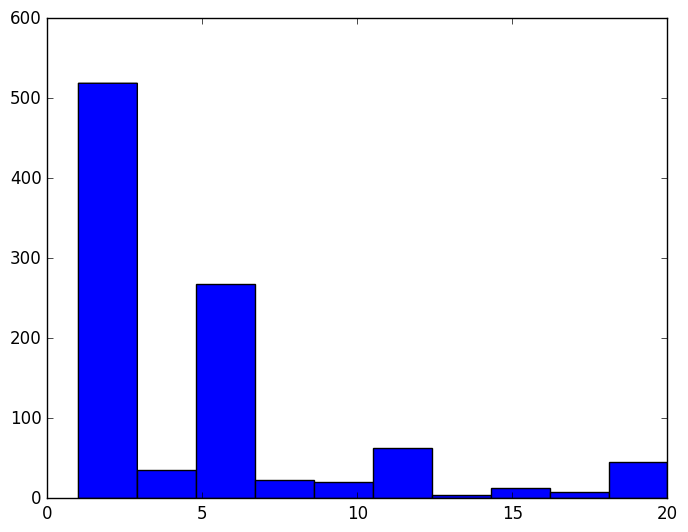

Any[6,11,3,1,1,11,19,1,5,6,6,1,1,8,1,6,1,5,1,1,1,1,6,5,5,1,12,19,1,1,5,8,1,1,11,6,1,1,6,1,5,1,5,1,1,6,3,1,6,9,1,6,1,1,9,1,6,19,6,1,1,19,6,1,1,5,1,1,1,1,5,1,1,1,11,5,11,3,3,1,11,1,5,1,1,1,6,1,3,5,16,5,1,5,1,1,1,1,1,15,1,6,9,1,1,6,1,11,1,1,6,1,6,1,5,1,1,1,5,1,6,1,1,1,3,6,1,1,1,11,1,1,5,6,1,1,1,6,16,6,3,6,1,1,1,6,17,8,1,1,6,1,6,1,1,1,6,6,5,19,1,5,1,6,1,1,1,1,1,7,1,11,1,12,11,5,1,6,1,1,12,1,1,20,6,6,1,19,5,19,1,6,11,6,1,1,11,1,14,5,20,5,5,1,3,1,6,1,15,1,1,9,1,1,1,6,1,1,19,6,1,1,1,7,1,1,16,1,1,6,1,7,1,1,20,1,1,9,1,1,1,1,5,1,1,5,14,5,1,6,11,1,6,3,6,11,19,1,8,19,1,11,6,5,1,5,1,1,1,5,1,5,19,6,11,5,1,1,9,11,6,1,1,11,1,1,17,16,1,5,1,9,1,1,6,1,6,1,5,1,1,11,1,1,11,6,3,11,5,1,6,3,6,1,6,1,1,1,17,19,19,1,1,1,1,1,19,12,20,1,6,1,7,11,6,1,11,6,1,3,3,6,6,1,1,5,6,10,1,6,12,6,1,6,17,1,1,6,20,6,6,6,13,1,1,1,6,3,1,11,19,12,1,1,15,1,5,1,1,8,1,8,4,1,1,6,1,5,16,1,19,5,6,1,1,19,5,1,1,6,6,1,6,1,1,5,1,1,1,1,6,1,14,1,1,6,1,1,6,5,6,2,6,1,1,1,1,19,1,6,1,5,1,1,6,3,1,19,16,19,6,1,1,1,5,6,1,6,5,6,1,11,1,1,1,1,1,9,5,1,6,

In [20]:
faculty_num = 20
students_num = 1000
mu = 50
sigma2 = 30
sigma2_error = 5

faculties_list = generate_faculties(faculty_num, students_num)
students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)

#println(s_prefs)
#println(f_prefs)

using PyPlot
fig, ax = subplots()
ax[:hist]([s_prefs[1, i] for i in 1:size(s_prefs, 2)])

各学部への応募の偏り

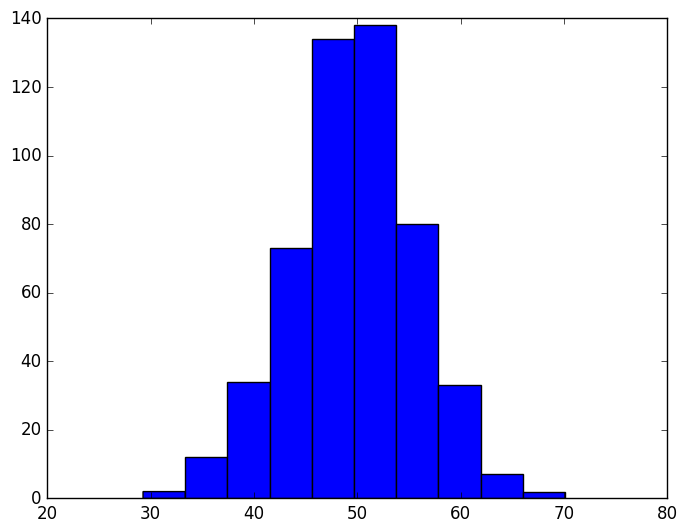

([2.0,12.0,34.0,73.0,134.0,138.0,80.0,33.0,7.0,2.0],[29.25231999800211,33.33468738406141,37.41705477012071,41.49942215618,45.58178954223931,49.664156928298596,53.7465243143579,57.8288917004172,61.91125908647649,65.9936264725358,70.07599385859508],Any[PyObject <matplotlib.patches.Rectangle object at 0x31cb681d0>,PyObject <matplotlib.patches.Rectangle object at 0x31cb689b0>,PyObject <matplotlib.patches.Rectangle object at 0x31cb71278>,PyObject <matplotlib.patches.Rectangle object at 0x31cb71b70>,PyObject <matplotlib.patches.Rectangle object at 0x31ca478d0>,PyObject <matplotlib.patches.Rectangle object at 0x31ca47978>,PyObject <matplotlib.patches.Rectangle object at 0x31ca74f60>,PyObject <matplotlib.patches.Rectangle object at 0x31ca74780>,PyObject <matplotlib.patches.Rectangle object at 0x31ca6e7f0>,PyObject <matplotlib.patches.Rectangle object at 0x31ca6ef98>])

In [23]:
fig, ax = subplots()
ax[:hist](map(s -> s.score, filter(s -> s.prefs[1] == 1, students_list)))

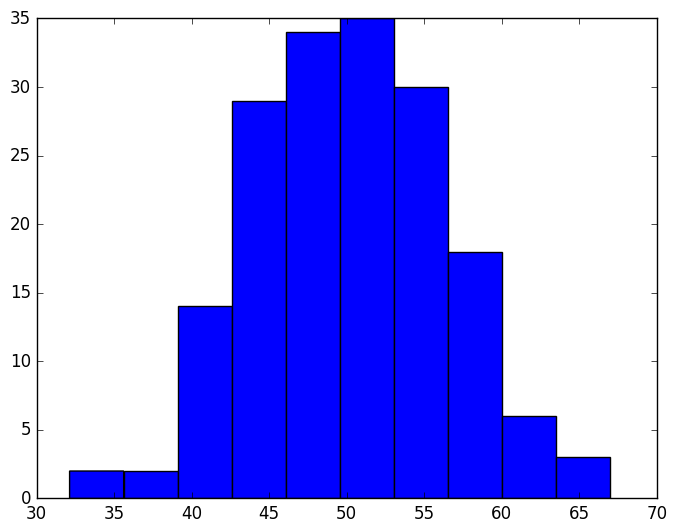

([2.0,2.0,14.0,29.0,34.0,35.0,30.0,18.0,6.0,3.0],[32.115147764749906,35.604213384807586,39.09327900486526,42.58234462492294,46.07141024498061,49.56047586503829,53.04954148509597,56.538607105153645,60.027672725211325,63.516738345269005,67.00580396532668],Any[PyObject <matplotlib.patches.Rectangle object at 0x31dd2c128>,PyObject <matplotlib.patches.Rectangle object at 0x31dd2c908>,PyObject <matplotlib.patches.Rectangle object at 0x31dd321d0>,PyObject <matplotlib.patches.Rectangle object at 0x31dd32ac8>,PyObject <matplotlib.patches.Rectangle object at 0x31dd37390>,PyObject <matplotlib.patches.Rectangle object at 0x31dd37c88>,PyObject <matplotlib.patches.Rectangle object at 0x31dd3f550>,PyObject <matplotlib.patches.Rectangle object at 0x31dd3fe48>,PyObject <matplotlib.patches.Rectangle object at 0x31dd45748>,PyObject <matplotlib.patches.Rectangle object at 0x31dd45ba8>])

In [27]:
fig, ax = subplots()
ax[:hist](map(s -> s.score, filter(s -> s.prefs[1] == 6, students_list)))

ある学部へ応募する人の成績の分布

生徒の成績と生徒の学部への選好が独立だと仮定しているのでこの結果になったと考えられます.
プログラムを少し変更すれば, 実際の各学科への応募者の平均点数と分散のデータを反映するようにすることもできると思います.

In [56]:
function cauchy()
    return tan(pi*(rand()-1/2))
end

cauchy (generic function with 1 method)

In [58]:
cauchy()

0.33839576182749387

In [89]:
l = 100
means = Array(Float64, l)
for k in 1:l
    num = 10
    cauchies = Array(Float64, num)
    for i in 1:num
        cauchies[i] = cauchy()
    end
    means[k] = mean(cauchies)
end
#cauchies

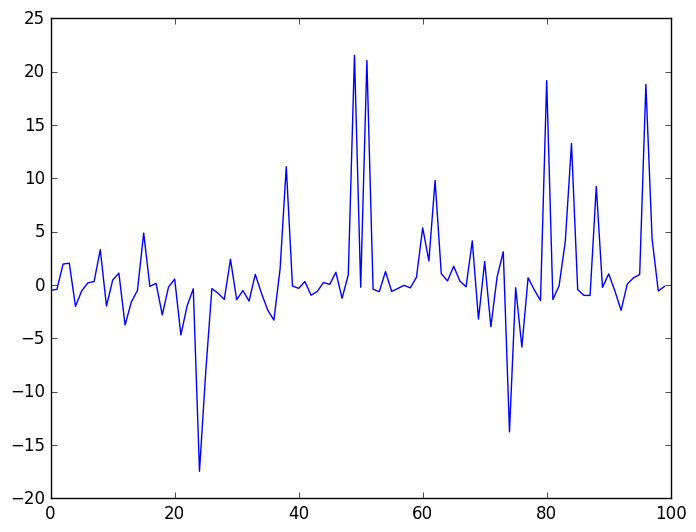

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320654908>

In [90]:
plot(means)

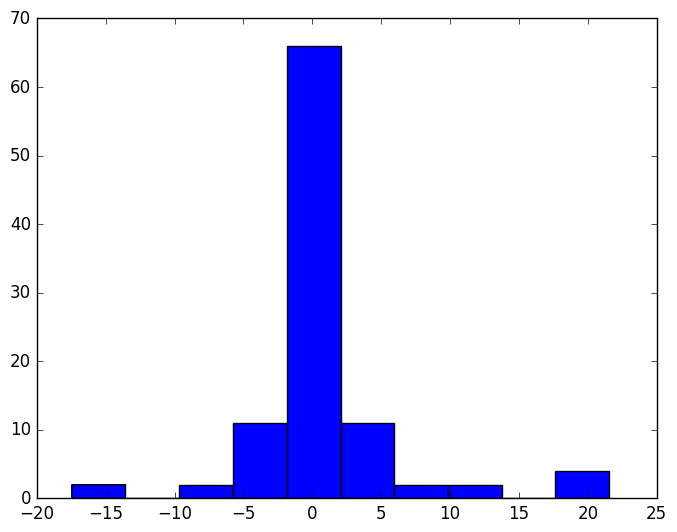

([2.0,0.0,2.0,11.0,66.0,11.0,2.0,2.0,0.0,4.0],[-17.4611376407639,-13.560364872971595,-9.65959210517929,-5.758819337386985,-1.8580465695946788,2.0427261981976272,5.9434989659899315,9.84427173378224,13.745044501574544,17.64581726936685,21.546590037159152],Any[PyObject <matplotlib.patches.Rectangle object at 0x31d54f5f8>,PyObject <matplotlib.patches.Rectangle object at 0x31d54fdd8>,PyObject <matplotlib.patches.Rectangle object at 0x31d5556d8>,PyObject <matplotlib.patches.Rectangle object at 0x31d555f98>,PyObject <matplotlib.patches.Rectangle object at 0x31d55e898>,PyObject <matplotlib.patches.Rectangle object at 0x31d564160>,PyObject <matplotlib.patches.Rectangle object at 0x31d564a58>,PyObject <matplotlib.patches.Rectangle object at 0x31d56a320>,PyObject <matplotlib.patches.Rectangle object at 0x31d56ac18>,PyObject <matplotlib.patches.Rectangle object at 0x31d5704e0>])

In [91]:
fig, ax = subplots()
ax[:hist](means)

In [92]:
l = 100
means = Array(Float64, l)
for k in 1:l
    num = 10
    rands = Array(Float64, num)
    for i in 1:num
        rands[i] = rand()
    end
    means[k] = mean(rands)
end
#cauchies

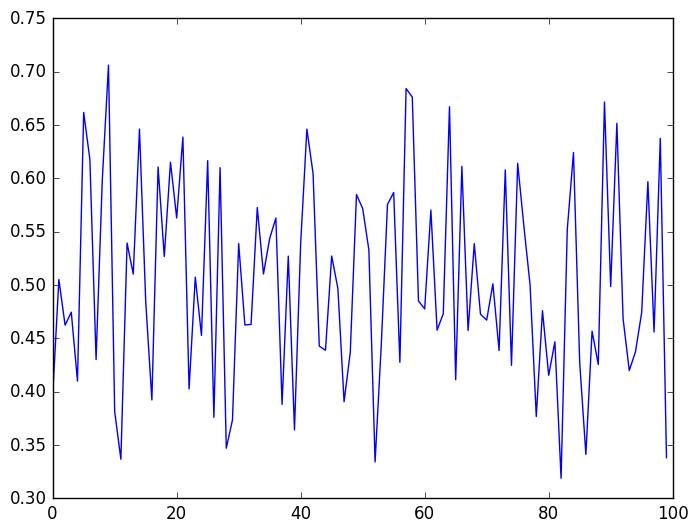

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d5dd4a8>

In [93]:
plot(means)

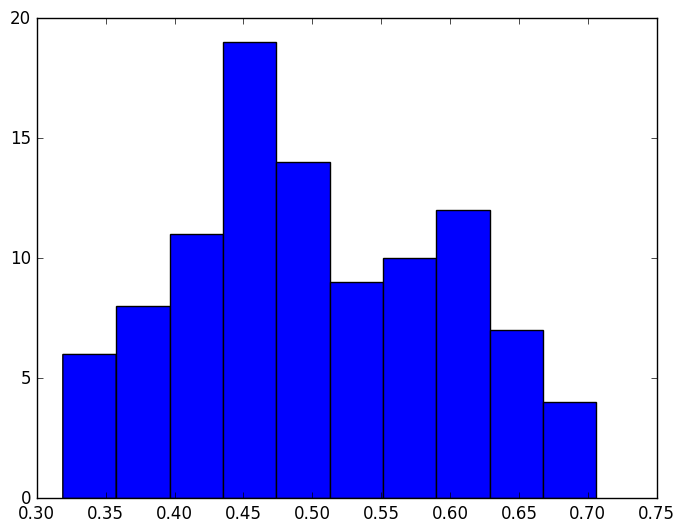

([6.0,8.0,11.0,19.0,14.0,9.0,10.0,12.0,7.0,4.0],[0.3188929496808659,0.35762157953182255,0.3963502093827792,0.4350788392337359,0.47380746908469257,0.5125360989356492,0.5512647287866059,0.5899933586375625,0.6287219884885192,0.6674506183394759,0.7061792481904325],Any[PyObject <matplotlib.patches.Rectangle object at 0x31d6464a8>,PyObject <matplotlib.patches.Rectangle object at 0x31d646c88>,PyObject <matplotlib.patches.Rectangle object at 0x31d64c550>,PyObject <matplotlib.patches.Rectangle object at 0x31d64ce48>,PyObject <matplotlib.patches.Rectangle object at 0x31d651748>,PyObject <matplotlib.patches.Rectangle object at 0x31d651ba8>,PyObject <matplotlib.patches.Rectangle object at 0x31d659908>,PyObject <matplotlib.patches.Rectangle object at 0x31d65e1d0>,PyObject <matplotlib.patches.Rectangle object at 0x31d65eac8>,PyObject <matplotlib.patches.Rectangle object at 0x31d663390>])

In [94]:
fig, ax = subplots()
ax[:hist](means)

In [5]:
include("functions.jl")
faculty_num = 20
student_num = 200
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

ev1 = []
ev2 = []
ev3 = []
ev4 = []

for cap in 2:40
    faculties_list = [Faculty(i, Array(Int, student_num+1), rand(), rand(), cap, [i]) for i in 1:faculty_num]
    students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num)

    set_prefs_faculties(faculties_list, students_list)
    set_prefs_students(students_list, faculties_list)
    #println(faculties_list)

    s_prefs = generate_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    #println(s_prefs)
    #println(f_prefs)

    s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

    push!(ev1, evaluate_matched(s_matched, s_prefs))
    push!(ev2, evaluate_matched2(s_matched, s_prefs))
    push!(ev3, evaluate_matched3(s_matched, s_prefs))
    push!(ev4, evaluate_matched4(s_matched, s_prefs))
    #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
    #println(sorted_students_list)
end

[0,0,1,0,0,0,0,1,0,2][3,8,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
1.0
1.0
1.0


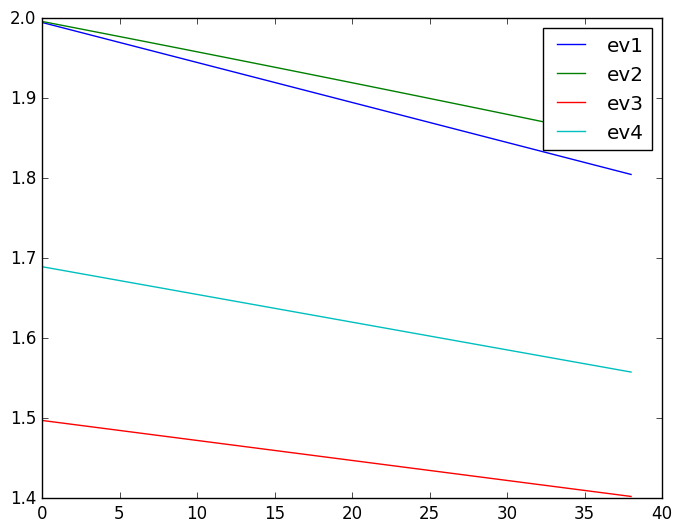

PyObject <matplotlib.legend.Legend object at 0x324c57e10>

In [6]:
using PyPlot
plot(ev1, label="ev1")
plot(ev2, label="ev2")
plot(ev3, label="ev3")
plot(ev4, label="ev4")
legend()

In [6]:
using DataFrames
using PyPlot
using ExcelReaders
include("functions.jl")
student_num = 3000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

faculties_list = read_faculty_data("revised.csv", student_num)
faculty_num = length(faculties_list)
students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)

#println(s_prefs)
#println(f_prefs)

s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

#sorted_students_list = get_sorted_students_list(students_list, faculties_list)
#println(sorted_students_list)

[0,0,3,0,2,0,0,2,0,0][0,0,0,0,0,0,0,0,0,8,5,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
1.1
1.140175425099138
1.05


([0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],[1367,1662,1913,340,2351,2461,752,1718,572,209  …  0,0,0,0,0,0,0,0,0,0],[1,119,120,121,122,123,125,206,209,227  …  890,892,898,906,930,963,971,973,975,981])

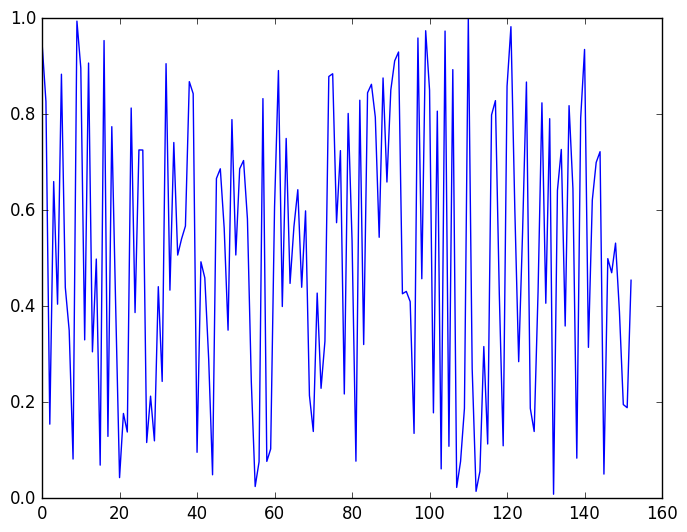

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e713c88>

In [8]:
plot([f.level for f in faculties_list])

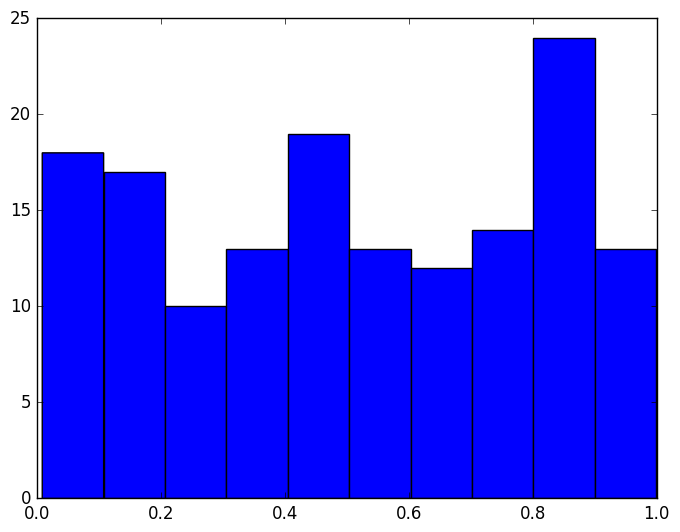

([18.0,17.0,10.0,13.0,19.0,13.0,12.0,14.0,24.0,13.0],[0.008766734825840672,0.10779628555812562,0.20682583629041057,0.30585538702269555,0.40488493775498047,0.5039144884872654,0.6029440392195504,0.7019735899518353,0.8010031406841203,0.9000326914164052,0.9990622421486901],Any[PyObject <matplotlib.patches.Rectangle object at 0x3215002b0>,PyObject <matplotlib.patches.Rectangle object at 0x321500a90>,PyObject <matplotlib.patches.Rectangle object at 0x321505358>,PyObject <matplotlib.patches.Rectangle object at 0x321505c50>,PyObject <matplotlib.patches.Rectangle object at 0x32150c518>,PyObject <matplotlib.patches.Rectangle object at 0x32150ce10>,PyObject <matplotlib.patches.Rectangle object at 0x321513710>,PyObject <matplotlib.patches.Rectangle object at 0x321513fd0>,PyObject <matplotlib.patches.Rectangle object at 0x3215188d0>,PyObject <matplotlib.patches.Rectangle object at 0x32151e198>])

In [11]:
fig, ax = subplots()
ax[:hist]([f.level for f in faculties_list])

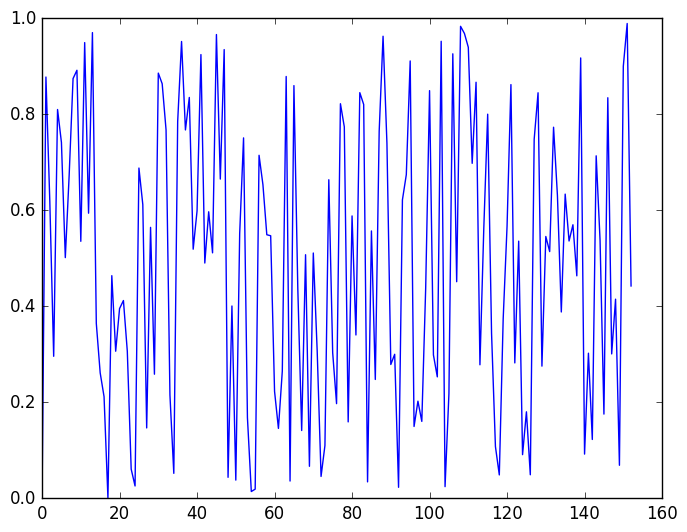

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321070780>

In [9]:
plot([f.preference for f in faculties_list])

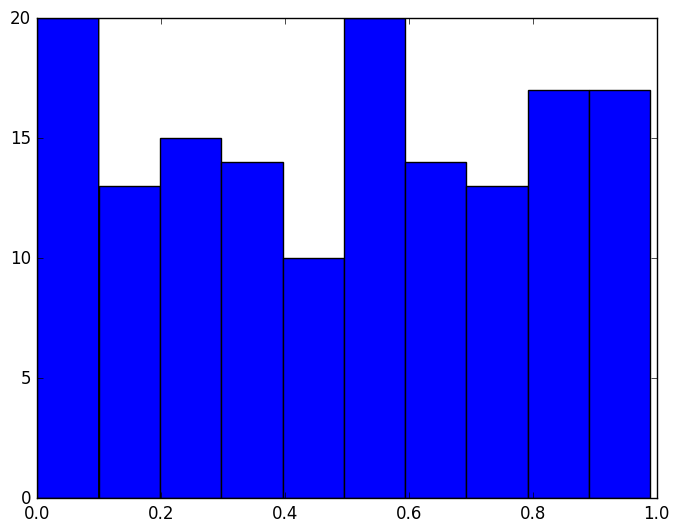

([20.0,13.0,15.0,14.0,10.0,20.0,14.0,13.0,17.0,17.0],[0.0010491963162873041,0.09989031796854402,0.19873143962080073,0.2975725612730574,0.39641368292531415,0.4952548045775709,0.5940959262298275,0.6929370478820843,0.791778169534341,0.8906192911865977,0.9894604128388544],Any[PyObject <matplotlib.patches.Rectangle object at 0x321299e80>,PyObject <matplotlib.patches.Rectangle object at 0x3212a1668>,PyObject <matplotlib.patches.Rectangle object at 0x3212a1f28>,PyObject <matplotlib.patches.Rectangle object at 0x3212a4828>,PyObject <matplotlib.patches.Rectangle object at 0x3212a4c88>,PyObject <matplotlib.patches.Rectangle object at 0x3212ad9e8>,PyObject <matplotlib.patches.Rectangle object at 0x3212b22b0>,PyObject <matplotlib.patches.Rectangle object at 0x3212b2ba8>,PyObject <matplotlib.patches.Rectangle object at 0x3212ba470>,PyObject <matplotlib.patches.Rectangle object at 0x3212bad68>])

In [10]:
fig, ax = subplots()
ax[:hist]([f.preference for f in faculties_list])

In [12]:
evaluate_matched(s_matched, s_prefs)

13.567666666666666

In [13]:
evaluate_matched2(s_matched, s_prefs)

17.735585696559333

In [14]:
evaluate_matched3(s_matched, s_prefs)

1.8448716833166836

In [15]:
evaluate_matched4(s_matched, s_prefs)

3.2229473889201654

In [9]:
using DataFrames
using PyPlot
using ExcelReaders
include("functions.jl")
student_num = 3000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

akiramenai = []
akirameru = []
for preference in 0:0.05:1
    faculties_list = read_faculty_data("revised.csv", student_num)
    faculty_num = length(faculties_list)
    students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> preference)

    set_prefs_faculties(faculties_list, students_list)
    set_prefs_students(students_list, faculties_list)
    #println(faculties_list)

    s_prefs = generate_prefs(students_list)
    s_real_prefs = generate_real_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    #println(s_prefs)
    #println(f_prefs)

    s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

    #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
    #println(sorted_students_list)
    push!(akirameru, evaluate_matched(s_matched, s_prefs))
    push!(akiramenai, evaluate_matched(s_matched, s_real_prefs))
end

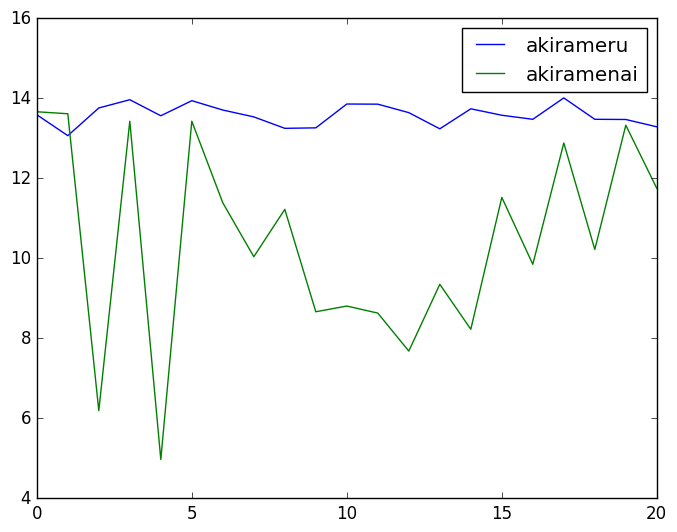

PyObject <matplotlib.legend.Legend object at 0x320ab4940>

In [12]:
plot(akirameru, label="akirameru")
plot(akiramenai, label="akiramenai")
legend()

In [15]:
using DataFrames
using PyPlot
using ExcelReaders
include("functions.jl")
student_num = 3000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

akiramenai = []
akirameru = []
for preference in 0:0.02:1
    faculties_list = read_faculty_data("revised.csv", student_num)
    faculty_num = length(faculties_list)
    students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> preference)

    set_prefs_faculties(faculties_list, students_list)
    set_prefs_students(students_list, faculties_list)
    #println(faculties_list)

    s_prefs = generate_prefs(students_list)
    s_real_prefs = generate_real_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    #println(s_prefs)
    #println(f_prefs)

    s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

    #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
    #println(sorted_students_list)
    push!(akirameru, evaluate_matched(s_matched, s_prefs))
    push!(akiramenai, evaluate_matched(s_matched, s_real_prefs))
end

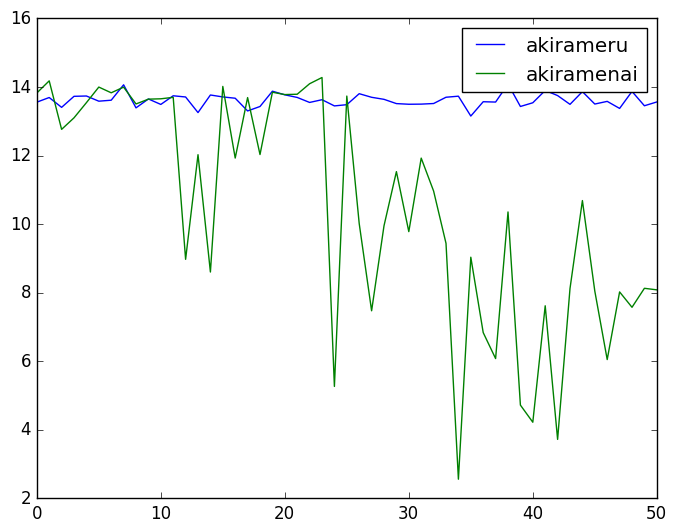

PyObject <matplotlib.legend.Legend object at 0x321017978>

In [16]:
plot(akirameru, label="akirameru")
plot(akiramenai, label="akiramenai")
legend()